---
title: Gradient descent illustration
date: 2025-01-01
author: Haky Im
eval: False
---

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

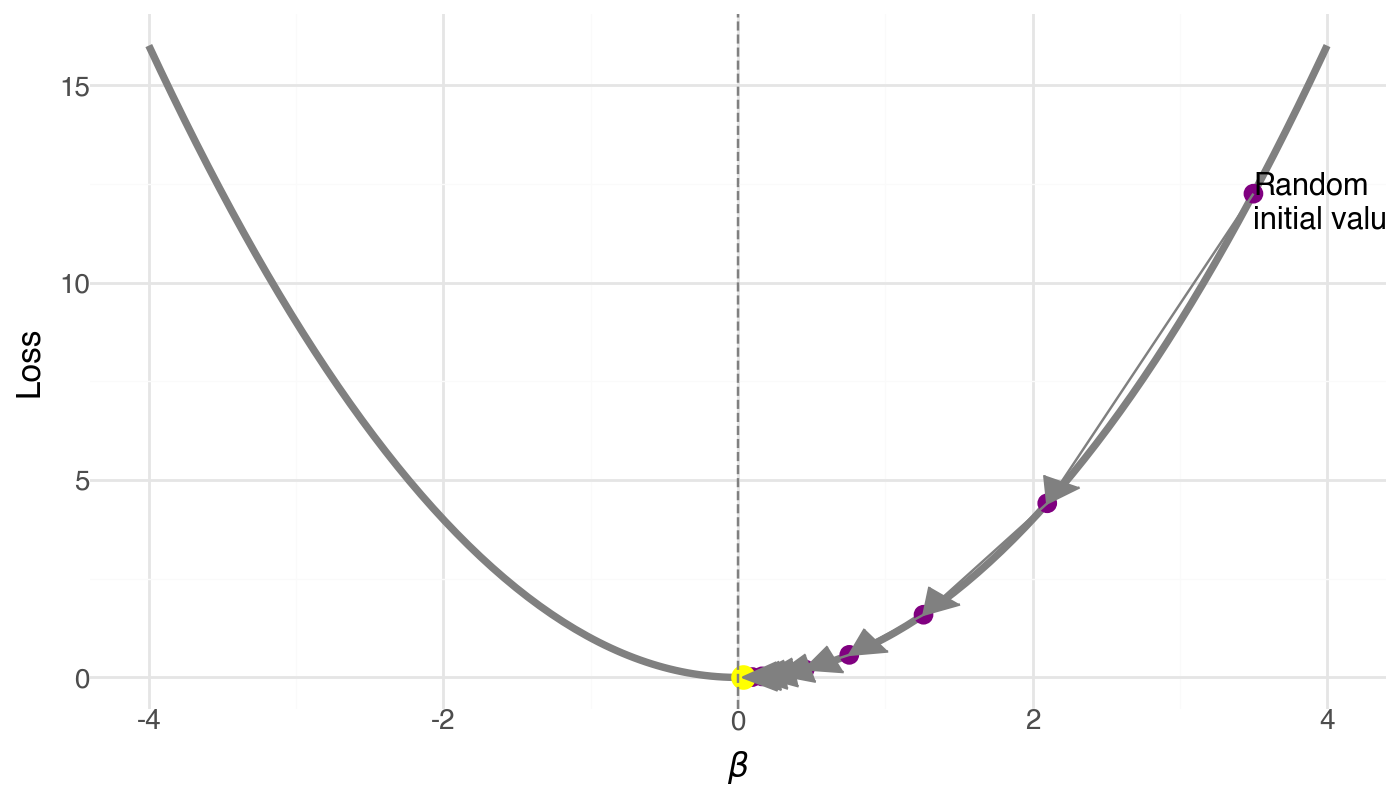

In [3]:
# Loss function and its gradient
def loss(beta):
    return beta ** 2

def grad(beta):
    return 2 * beta

# Simulate gradient descent
beta = 3.5  # random initial value
learning_rate = 0.2
steps = []

for i in range(10):
    current_loss = loss(beta)
    steps.append({'step': i, 'beta': beta, 'loss': current_loss})
    beta -= learning_rate * grad(beta)

df = pd.DataFrame(steps)

# Create full curve for loss function
beta_vals = np.linspace(-4, 4, 200)
loss_vals = loss(beta_vals)
df_curve = pd.DataFrame({'beta': beta_vals, 'loss': loss_vals})

# Create arrows for learning steps
df_arrows = df[:-1].copy()
df_arrows['beta_end'] = df['beta'][1:].values
df_arrows['loss_end'] = df['loss'][1:].values

# Plot
p = (
    ggplot(df_curve, aes('beta', 'loss')) +
    geom_line(size=1.5, color="gray") +
    geom_point(df, aes('beta', 'loss'), color='purple', size=3) +
    geom_point(df.tail(1), aes('beta', 'loss'), color='yellow', size=4) +
    geom_segment(df_arrows,
                 aes(x='beta', y='loss', xend='beta_end', yend='loss_end'),
                 arrow=arrow(length=0.15, type='closed'),
                 color='gray') +
    annotate('text', x=3.5, y=12, label='Random\ninitial value', ha='left') +
#    annotate('text', x=1.5, y=5, label='Learning step', ha='left') +
#    annotate('text', x=0, y=0.5, label='Minimum', ha='left') +
    geom_vline(xintercept=0, linetype='dashed', color='gray') +
    labs(x=r'$\beta$', y='Loss') +
    theme_minimal() +
    theme(
        figure_size=(7, 4),
        axis_title=element_text(size=12),
        axis_text=element_text(size=10)
    )
)

p
